# Redes neuronales convolucionales: Aplicación

¿Qué vamos a hacer?

- Implementar una red convolucional en Keras
- Entrenar la red en un dataset con fotos números con señas
- Usar la red para predecir en ejemplos nuevos

In [6]:
from google.colab import files
from matplotlib import  pyplot

uploaded = files.upload()
#subir el archivo dataset.zip

In [2]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: cnn_utils.py            
   creating: datasets/
  inflating: datasets/test_signs.h5  
  inflating: datasets/train_signs.h5  


In [3]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

In [4]:
# Cargar el dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

In [9]:
X_train_orig.shape

(1080, 64, 64, 3)

SIGNS es un dataset con una colección de 6 signos hechos con manos representando los números del 0 al 5.

<img src="https://drive.google.com/uc?export=view&id=1Tm9arSkvypYpXzANQo4C2DtMWzkjA4hO" style="width:800px;height:300px;">

La próxima celda muestra un ejemplo de seña y su label.

y = 3


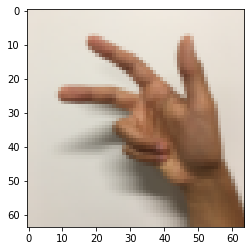

In [10]:
# Ejemplo del dataset
index = 100
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [11]:
Y_train_orig.shape

(1, 1080)

In [12]:
# veamos un poco el dataset
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig,6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("Número de ejemplos de training = " + str(X_train.shape[0]))
print ("Número de ejemplos de test = " + str(X_test.shape[0]))
print ("dimensiones de X_train: " + str(X_train.shape))
print ("dimensiones de Y_train: " + str(Y_train.shape))
print ("dimensiones de X_test: " + str(X_test.shape))
print ("dimensiones de Y_test shape: " + str(Y_test.shape))

Número de ejemplos de training = 1080
Número de ejemplos de test = 120
dimensiones de X_train: (1080, 64, 64, 3)
dimensiones de Y_train: (1080, 6)
dimensiones de X_test: (120, 64, 64, 3)
dimensiones de Y_test shape: (120, 6)


Estas son las capas de keras que vamos a utilizar:

Capa Convolucional:

`Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
    dilation_rate=(1, 1), groups=1, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs
)`


Capa Max Pooling, la función tiene estos parámetros: 

`MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid", data_format=None, **kwargs
)`

Capa Flatten:

`Flatten(
    data_format=None, **kwargs
)`

Capa Dense:

`Dense(
    units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
    activity_regularizer=None, kernel_constraint=None, bias_constraint=None,
    **kwargs
)`

Fuente: tps://www.tensorflow.org/api_docs/python/tf/keras/layers

Estructura de la red en detalle:

- CONV2D: filtro de 4x4, 8 canales, stride of 1, padding 'SAME', activación RELU
- MAXPOOL: window 8x8, stride 8, padding 'SAME'
- CONV2D: filtro de 2x2, 16 canales, stride of 1, padding 'SAME', activación RELU
- MAXPOOL: window 4x4, stride 4, padding 'SAME'
- FLATTEN
- Capa FC con 6 salidas


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten
# usar Sequential
model = Sequential()
# agregar las capas

### Comenzar el código acá ###
model.add(Conv2D(filters = 8, kernel_size = (4, 4), strides=1, padding='same', activation='relu', input_shape=(64, 64, 3)))
# output: ('same' mismo valor que la entrada en la salida luego de la convolucion)->> 64x64x8
model.add(MaxPooling2D( pool_size=(8, 8), strides=8, padding='same'))
# Pooling con ventana 8x8 y zancada 8 padding same = 64 - 8 /8   + 1 ->> 8x8x8
model.add(Conv2D(filters = 16, kernel_size = (2,2), strides=1 , padding='same', activation='relu'))
# conv padding same ->>8x8x16
model.add(MaxPooling2D(pool_size=(4,4), strides=4,padding='same'))
# Pooling ventana 4x4 zancada 4 padding same = 8-4 /4  + 1 = 2 ->> 2x2x16
model.add(Flatten())
# flatten ->> 64
model.add(Dense(6, activation='softmax'))


opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

model_history = model.fit(X_train, Y_train, epochs=40,batch_size= 64,
                    validation_data=(X_test, Y_test))

Epoch 1/40
17/17 [==============================] - 2s 105ms/step - loss: 1.8002 - accuracy: 0.1602 - val_loss: 1.7922 - val_accuracy: 0.1667
Epoch 2/40
17/17 [==============================] - 2s 98ms/step - loss: 1.7884 - accuracy: 0.1769 - val_loss: 1.7851 - val_accuracy: 0.2917
Epoch 3/40
17/17 [==============================] - 2s 98ms/step - loss: 1.7665 - accuracy: 0.2333 - val_loss: 1.7326 - val_accuracy: 0.2750
Epoch 4/40
17/17 [==============================] - 2s 100ms/step - loss: 1.6556 - accuracy: 0.3056 - val_loss: 1.6736 - val_accuracy: 0.3250
Epoch 5/40
17/17 [==============================] - 2s 98ms/step - loss: 1.6090 - accuracy: 0.2898 - val_loss: 1.6468 - val_accuracy: 0.3083
Epoch 6/40
17/17 [==============================] - 2s 98ms/step - loss: 1.5561 - accuracy: 0.3481 - val_loss: 1.5412 - val_accuracy: 0.4250
Epoch 7/40
17/17 [==============================] - 2s 99ms/step - loss: 1.5159 - accuracy: 0.3537 - val_loss: 1.4639 - val_accuracy: 0.3833
Epoch 8/40


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
Total params: 1,310
Trainable params: 1,310
Non-trainable params: 0
____________________________________________________

Los valores reales son : [0 0 0 5 1 0] 


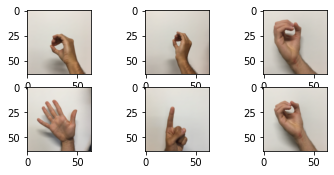

Los valores de la prediccion son : [0 0 0 5 3 0] 


In [29]:
# Predecir las imagenes
predicciones = model.predict(X_test[:6])


# Chequear que son correctas
#print(Y_test[:5])
print('Los valores reales son : {} '.format(np.argmax(Y_test[0:6], axis=1)))

# Plotear esas imágenes
for i in range(6):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_test[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# Imprimir las predicciones
print('Los valores de la prediccion son : {} '.format(np.argmax(predicciones, axis=1))) 